## DWave QPU

In [3]:
import sys
import wikipedia
import numpy as np
import pandas as pd

from qubo_util import *

## Jobs Info

In [4]:
### Lets define the basics

bend = [0, 1, 2]
weld = [3, 4]
paint =  [5]

bend_length = 2
weld_length = 3
paint_length = 6

t_step = 3
t_step_in_sec = 30

In [21]:
jobs50 = [(0, 0, 1, 1, 2, 3),
 (1, 0, 2, 3, 0, 3)]

operations = job_info(jobs50, bend_length, weld_length, paint_length, t_step_in_sec, bend, weld, paint, t_step)

The maximal maketime for the given operations is: 810 second(s).
Which is equal to: 27 time steps.


Anzahl an Kombinationen: 49

   order  part  bend  weld  paint  deadline
0      0     0     2     3     12        18
1      1     0     4     9      0        18


In [22]:
jobs = jobs50

## Parameter

In [23]:
# for DWave
numr = 10  # Number of samples / quantum computations
#chainStrength is defined als max absolute value in QUBO (see find_chstr(QUBO))


#for QUBO
alpha = 2
beta = 1.5
gamma = 2
delta = 0.3
    

## QUBO

In [24]:
QUBO = get_QUBO(jobs, operations, alpha, beta, gamma, delta, bend_length, weld_length, paint_length, bend, weld, paint)

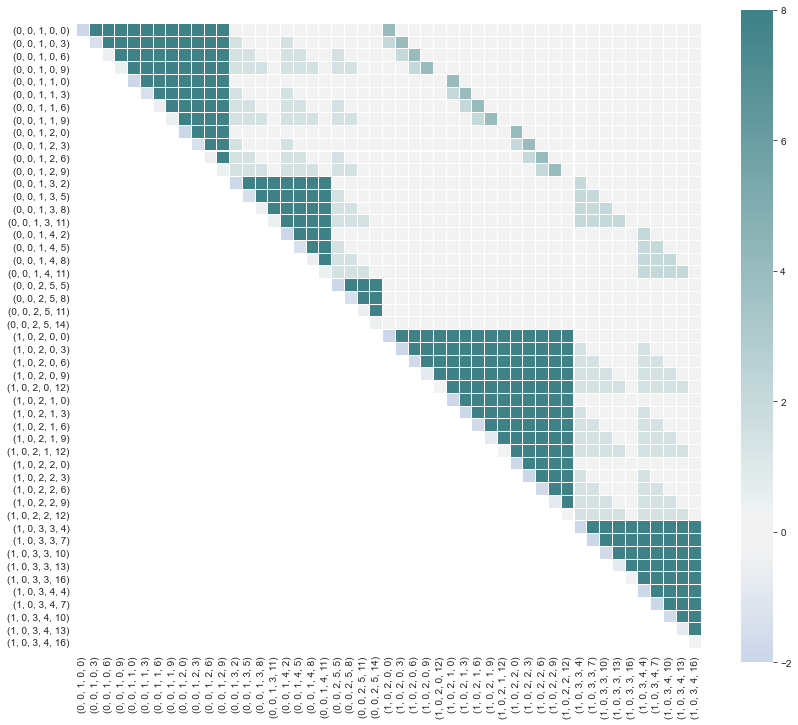

In [25]:
get_qubo_heatmap(QUBO, operations, "QUBO")

In [26]:
qubo_dictionary = qubo_to_dictionary_ohne_null(QUBO, operations)

## DWave Advantage

In [27]:
#DWave Simulator
#for QUBO
numr = 1000
sampleset_Adv = on_DWave(QUBO, numr)

In [28]:
print(sampleset_Adv)

     0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 ... 48 energy num_oc. ...
3    1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...  0  -10.0       1 ...
4    0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0 ...  0  -10.0       1 ...
8    1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...  0  -10.0       1 ...
14   1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0 ...  0  -10.0       1 ...
15   1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...  0  -10.0       1 ...
16   0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0 ...  0  -10.0       1 ...
459  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...  0  -10.0       1 ...
6    1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0 ...  0   -9.7       1 ...
59   0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0 ...  0   -9.7       1 ...
116  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0 ...  0   -9.7       1 ...
354  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...  0   -9.7       1 ...
0    1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...  0   -9.

In [29]:
sample_nmr = 0
df_schedule = make_schedule_from_sample(jobs, operations, sampleset_Adv, sample_nmr, bend_length, weld_length, paint_length)

In [30]:
get_qubo_ganttchart(df_schedule)

In [31]:
schedule = get_results(sampleset_Adv, operations, sample_nmr)
check_constraints(schedule, jobs, paint_length, bend_length, weld_length)

H_0 erfüllt: True
H_1 erfüllt: True
H_2 erfüllt: True
H_3 erfüllt: True


## DWave Hybrid

In [32]:
sampleset_Hybrid = on_DWave_Hybrid(QUBO)

In [33]:
print(sampleset_Hybrid)

   0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 ... 48 energy num_oc.
0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0 ...  0  -10.0       1
['BINARY', 1 rows, 1 samples, 49 variables]


In [34]:
sample_nmr = 0
df_schedule = make_schedule_from_sample(jobs, operations, sampleset_Hybrid, sample_nmr, bend_length, weld_length, paint_length)

In [35]:
get_qubo_ganttchart(df_schedule)

In [36]:
schedule = get_results(sampleset_Hybrid, operations, sample_nmr)
check_constraints(schedule, jobs, paint_length, bend_length, weld_length)

H_0 erfüllt: True
H_1 erfüllt: True
H_2 erfüllt: True
H_3 erfüllt: True


## Vergleich

In [17]:
#DWave sampleset_Adv
print(sampleset_Adv)

     0  1  2  3  4  5  6  7  8  9 10 11 energy num_oc. chain_b.
0    0  0  1  0  1  1  1  0  0  0  0  0   -8.0      48      0.0
1    0  1  0  0  1  1  1  0  0  0  0  0   -8.0      41      0.0
2    1  0  0  0  1  1  1  0  0  0  0  0   -8.0      28      0.0
3    0  1  0  1  0  1  0  0  0  1  0  0   -8.0      13      0.0
4    0  0  1  1  0  1  0  0  0  1  0  0   -8.0      15      0.0
5    1  0  0  1  0  1  0  0  0  1  0  0   -8.0      13      0.0
6    0  1  0  1  0  1  0  0  0  0  1  0   -7.1      31      0.0
7    1  0  0  1  0  1  0  0  0  0  1  0   -7.1      17      0.0
8    0  0  1  1  0  1  0  0  0  0  1  0   -7.1      30      0.0
9    0  0  1  0  1  1  0  1  0  0  0  0   -7.1      30      0.0
10   0  1  0  0  1  1  0  1  0  0  0  0   -7.1      31      0.0
11   1  0  0  0  1  1  0  1  0  0  0  0   -7.1      25      0.0
185  0  1  0  0  1  1  0  1  0  0  0  0   -7.1       1 0.083333
12   0  1  0  0  1  1  0  0  1  0  0  0   -6.2      34      0.0
13   0  1  0  1  0  1  0  0  0  0  0  1 

In [18]:
#DWave sampleset_Hybrid
print(sampleset_Hybrid)


   0  1  2  3  4  5  6  7  8  9 10 11 energy num_oc.
0  0  0  1  0  1  1  1  0  0  0  0  0   -8.0       1
['BINARY', 1 rows, 1 samples, 12 variables]
